In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Librerias de los modelos supervisados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

## Modelación reduciendo el número de ejemplos a 3807

In [2]:
df = pd.read_csv("./dataset/predictive_maintenance_transform.csv")

In [3]:
data_0 = df[df["Estado del transformador"] == 0]
data_1 = df[df["Estado del transformador"] == 1]
data_0.shape, data_1.shape

((15066, 16), (807, 16))

In [4]:
# tomamos una muestra de 3000

data_0 = data_0.sample(n = int(3e+3))
data_0.shape

(3000, 16)

In [5]:
df = data_1.append(data_0)
df["Estado del transformador"].value_counts()

C:\Users\Victor\AppData\Local\Temp\ipykernel_4928\2724416060.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_1.append(data_0)


0    3000
1     807
Name: Estado del transformador, dtype: int64

In [6]:
df

,Ubicación,Potencia,Autoprotección,Promedio de DDT,Máximo de DDT,tasa de quema,Criticidad-Nivel Ceráunico,Conectores amobibles,Tipo de clientes,Número de usuarios,EENS,Tipo de instalación,Red Aérea,Cola de circuito,km de red BT,Estado del transformador
10,1,112.5,0,3.155602,6.6,0.00,0,1,1,39,1822.5,1,1,1,0.18860,1
61,1,112.5,0,3.155602,6.6,0.00,0,1,6,146,1822.5,3,1,0,0.34724,1
264,1,10.0,0,3.155602,6.6,0.00,0,1,3,2,162.0,2,1,0,0.26430,1
282,1,75.0,0,3.155602,6.6,0.00,0,1,1,76,1215.0,2,1,1,0.39051,1
348,1,75.0,1,3.155602,6.6,0.25,0,1,5,73,1215.0,1,1,1,0.61925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10887,0,10.0,0,0.856320,3.1,0.75,0,1,5,6,162.0,2,1,0,0.53302,0
6024,0,5.0,1,1.351333,6.1,0.50,1,1,5,8,81.0,2,1,1,148651.00000,0
5729,0,25.0,0,1.104394,4.9,0.00,0,0,5,1,502.2,2,1,1,0.32516,0
10614,0,10.0,0,0.503331,4.9,0.00,0,0,5,12,221.4,2,1,0,192165.00000,0


## División del Dataset: train-test

In [7]:
dt_features = df.drop(columns = ["Estado del transformador"] , axis=1)
dt_target = df["Estado del transformador"]
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size = 0.2, random_state = 42, stratify=dt_target)

#### Normalización de los datos

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos Supervisados, Clasificación binaria

## Modelo 1: Regresión Logística

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### Evaluación

In [10]:
y_pred_lr = log_reg.predict(X_test)

In [11]:
lr_train = round(log_reg.score(X_train, y_train)*100, 2)
lr_accuracy = round(accuracy_score(y_test, y_pred_lr)*100, 2)

print("Accuracy del entrenamiento :",lr_train, "%")
print("Accuracy del modelo :",lr_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 83.05 %
Accuracy del modelo : 84.65 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       600
           1       0.69      0.50      0.58       162

    accuracy                           0.85       762
   macro avg       0.78      0.72      0.74       762
weighted avg       0.84      0.85      0.84       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


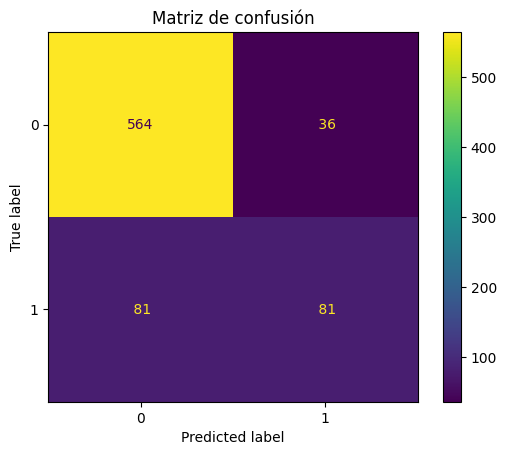

In [12]:
plot_confusion_matrix(log_reg, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 2: Árbol de decision

In [13]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### evaluación

In [14]:
y_pred_dt = tree.predict(X_test)

In [15]:
dt_train = round(tree.score(X_train, y_train)*100, 2)
dt_accuracy = round(accuracy_score(y_test, y_pred_dt)*100, 2)

print("Accuracy del entrenamiento :",dt_train, "%")
print("Accuracy del modelo :",dt_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 100.0 %
Accuracy del modelo : 78.48 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       600
           1       0.49      0.51      0.50       162

    accuracy                           0.78       762
   macro avg       0.68      0.68      0.68       762
weighted avg       0.79      0.78      0.79       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


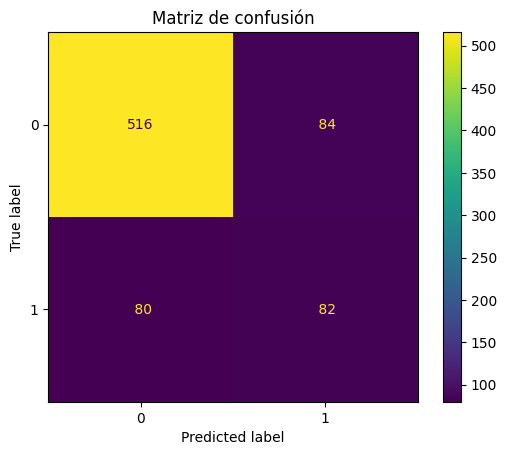

In [16]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(tree, X_test, y_test, values_format='3g');
plt.title("Matriz de confusión")
plt.show()

## Modelo 3: Bosques aleatorios

In [17]:
ran_for = RandomForestClassifier(n_estimators=150, criterion='gini', max_features='sqrt', max_depth=10)
ran_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

### Evaluación

In [18]:
y_pred_rf =ran_for.predict(X_test)

In [19]:
rf_train = round(ran_for.score(X_train, y_train)*100, 2)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf)*100, 2)

print("Accuracy del entrenamiento :",rf_train, "%")
print("Accuracy del modelo :",rf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 89.36 %
Accuracy del modelo : 85.43 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       600
           1       0.73      0.51      0.60       162

    accuracy                           0.85       762
   macro avg       0.80      0.73      0.75       762
weighted avg       0.84      0.85      0.84       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


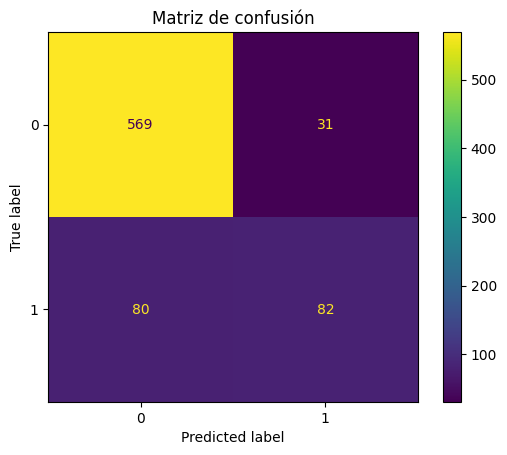

In [20]:
plot_confusion_matrix(ran_for, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 4: Máquina de Vectores de Soporte

In [21]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

### Evaluación

In [22]:
y_pred_svc = svc.predict(X_test)

In [23]:
svc_train = round(ran_for.score(X_train, y_train)*100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100, 2)

print("Accuracy del entrenamiento :",svc_train, "%")
print("Accuracy del modelo :",svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 89.36 %
Accuracy del modelo : 83.46 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       600
           1       0.73      0.35      0.48       162

    accuracy                           0.83       762
   macro avg       0.79      0.66      0.69       762
weighted avg       0.82      0.83      0.81       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


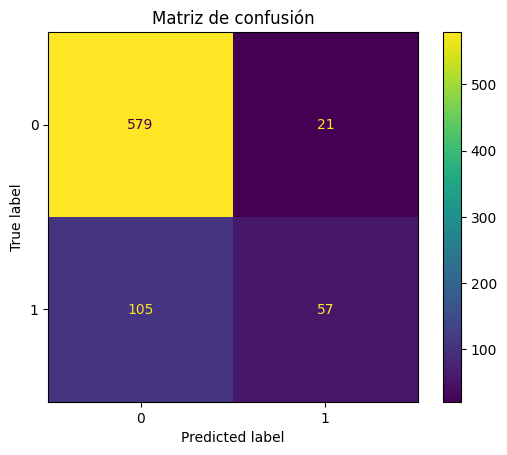

In [24]:
plot_confusion_matrix(svc, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()

## Modelo 5: K-vecinos cercanos

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluación

In [26]:
y_pred_knn = knn.predict(X_test)

In [27]:
knn_train = round(knn.score(X_train, y_train)*100, 2)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100, 2)

print("Accuracy del entrenamiento :",knn_train, "%")
print("Accuracy del modelo :",knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Accuracy del entrenamiento : 89.1 %
Accuracy del modelo : 81.89 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       600
           1       0.59      0.47      0.52       162

    accuracy                           0.82       762
   macro avg       0.73      0.69      0.71       762
weighted avg       0.81      0.82      0.81       762

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


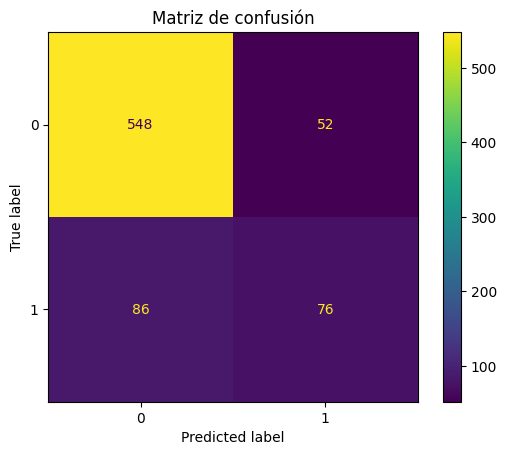

In [28]:
plot_confusion_matrix(knn, X_test, y_test);
plt.title("Matriz de confusión")
plt.show()